In [56]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Since the training and test data sets have already been separated, I first imported them.

In [57]:
train_set = pd.read_csv('C:\\Users\\arnia\\Desktop\\Kaggle\\Titanic\\train.csv')
test_set = pd.read_csv('C:\\Users\\arnia\\Desktop\\Kaggle\\Titanic\\test.csv')


It's best to conduct an exploratory data analysis first so that there is a better understanding of the data.

Text(0.5, 1.0, 'Count of Sex by Survived')

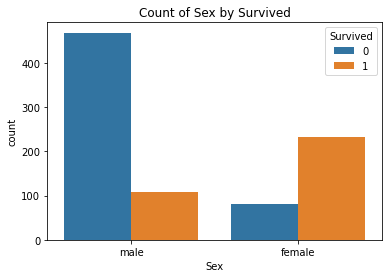

In [58]:
sns.countplot(x='Sex',hue='Survived',data=train_set)
plt.title('Count of Sex by Survived')

There is a clear distinction for each sex and the number of people who survived or have not survived.There's no need to conduct any feature engineering techniques for this field and it's going to be a vital feature when predicting who has or hasn't survived the crash. I then looked at another column within the dataset.

Text(0.5, 1.0, 'Count of Embarked by Survived')

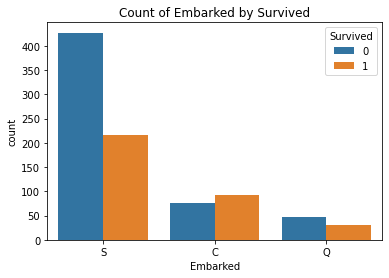

In [59]:
sns.countplot(x='Embarked',hue='Survived',data=train_set)
plt.title('Count of Embarked by Survived')


When looking at the passengers separted by the embarked location, there is a clear distinction on the S location but not so much on the C and D locations. As only one of the values displays a good distinction, this feature may not be vital for this problem.

Text(0.5, 1.0, 'Count of Parch by Survived')

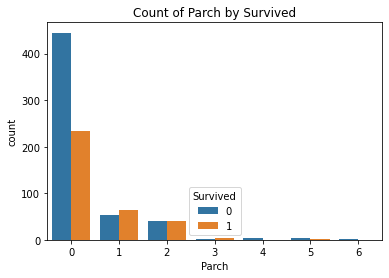

In [60]:
sns.countplot(x='Parch',hue='Survived',data=train_set)
plt.title('Count of Parch by Survived')


When looking at the # of parents/children aboard on the Titanic, the results are similar to the Embarked plot. There is a clear distinction for singles/couples but not so much on people who are parents and children. There is not a clear distinction especially in the 2 value and there are almost no values on the others. This feature is also not so much of an importance.

Text(0.5, 1.0, 'Count of SibSp by Survived')

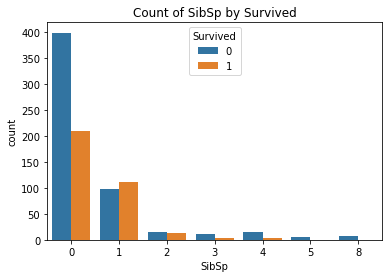

In [61]:
sns.countplot(x='SibSp',hue='Survived',data=train_set)
plt.title('Count of SibSp by Survived')


Although there is a clear distinction between all the values for people who have siblings or spouses, there is not enough data for values 2-8 for this feature to feed through an algorithm. It's then best to combine the limited values together so that there are mroe counts to represent for each value.

Text(0.5, 1.0, 'Count of Combined_SibSp by Survived')

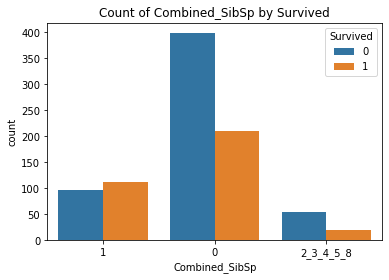

In [73]:
#defining a function for combining limited values together
def SibSpFeature_Eng(train_set):
    train_set['SibSp']=train_set['SibSp'].astype('str')
    SibSps = []
    
    #go through each name
    for sp in list(train_set['SibSp']):
        
        #combine sibsp values 2,3,4,5,6 into one value
        if sp in ['2','3','4','5','8']:
            SibSps.append('2_3_4_5_8')
        else:
            SibSps.append(sp)
    
    train_set['Combined_SibSp'] = SibSps
    return train_set

#convert both training and test data sets
train_set = SibSpFeature_Eng(train_set)
test_set = SibSpFeature_Eng(test_set)

sns.countplot(x='Combined_SibSp',hue='Survived',data=train_set)
plt.title('Count of Combined_SibSp by Survived')


When combining the limited categorical values together (2,3,4,5,8), it's easy to observe that there is a good dinstinction for all SibSp values for those who survived and those who died. The feature becomes important for this problem as the distinction between the has and has not survived increases. It's also interesting to take a look at the naming convention for all the passengers:

In [74]:
def Salut_FeatureEng(train_set):
    names = train_set['Name']; saluts = []

    #go through each name
    for idx,name in enumerate(list(names)):
    
        #find the delimiters that separate each salutation
        i1 = name.find(','); i2 = name.find('.')
    
        #find the salutation and append it
        name = name[i1+2:i2]; saluts.append(name)

    train_set['Salutations'] = saluts
    return train_set


train_set = Salut_FeatureEng(train_set)
test_set = Salut_FeatureEng(test_set)
train_set['Salutations'].value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Jonkheer          1
Don               1
Mme               1
Sir               1
the Countess      1
Ms                1
Capt              1
Lady              1
Name: Salutations, dtype: int64

It's interesting to observe each passenger is associated with a certain salutation such as: Mr, Mrs, Ms, Dr, etc. I made a count plot in order to see a distinction between the survived and non-survived using the salutations.

Text(0.5, 1.0, 'Count of Salutations by Survived')

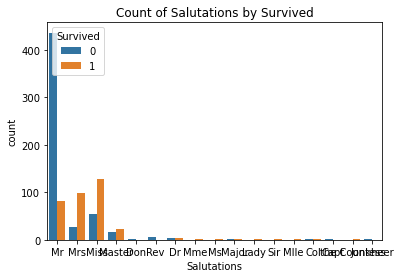

In [65]:
sns.countplot(x='Salutations',hue='Survived',data=train_set)
plt.title('Count of Salutations by Survived')


There is a huge imbalance of data as most of the passengers have "Mr" salutation. The consecutive 4 salutations have enough data but the rest of the salutations don't have enough counts for them to become a vital feature. It's best to combine the 3 salutations and then combine the limited salutations into one value.

Text(0.5, 1.0, 'Count of Combined_Salutations by Survived')

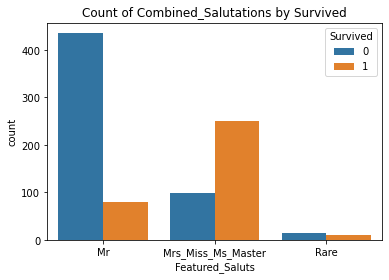

In [66]:
def SalutFeature_Eng(train_set):
    saluts = []
    
    #go through each name
    for salut in list(train_set['Salutations']):
        
        # combine the saluations accordingly
        if salut in ['Mrs','Miss','Ms','Master']:
            salut = 'Mrs_Miss_Ms_Master'
        elif salut in ['Capt','Col','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Rev','Sir','the Countess']:
            salut = 'Rare'
        saluts.append(salut)
       
    train_set['Featured_Saluts'] = saluts
    return train_set

#do both training and test data sets
train_set = SalutFeature_Eng(train_set)
test_set = SalutFeature_Eng(test_set)

sns.countplot(x='Featured_Saluts',hue='Survived',data=train_set)
plt.title('Count of Combined_Salutations by Survived')

When combining the limited values together (shown here as "Rare"), and the other 4 salutations, there is a good distinction between all three combined values. This featured, categorical column thus becomes critical in classifying whether a passenger has or has not survived the ship crash.

Now that all the important, featured columns have been found, I can then one-hot encode the essential categorical features and create a logistics regression model to classify the passengers.


In [71]:
from sklearn import preprocessing
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

# categorical columns updated
train_df = encode_string(train_set['Sex']); test_df = encode_string(test_set['Sex'])

for col in ['Featured_Saluts','Combined_SibSp']:
    temp = encode_string(train_set[col])
    train_df = np.concatenate([train_df, temp], axis=1)
    temp = encode_string(test_set[col])
    test_df = np.concatenate([test_df, temp], axis=1)
    
np.random.seed(round(len(train_set)/2))

import sklearn.model_selection as ms
idx = range(train_df.shape[0])
idx = ms.train_test_split(idx, test_size=round(len(train_df)*0.3))

x_train = train_df[idx[0],:]; y_train = train_set.iloc[idx[0],1]
x_test = train_df[idx[1],:]; y_test = train_set.iloc[idx[1],1]

# Construct the logistics regression model
from sklearn import linear_model
import sklearn.metrics as sklm

logistic_mod = linear_model.LogisticRegression()
logistic_mod.fit(x_train, y_train)

# print the model's intercept and coefficients
print('Intercept: ',logistic_mod.intercept_)
print('Coefficients: ',logistic_mod.coef_)

# get probabilities for each row
probabilities = logistic_mod.predict_proba(x_test)

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

scores = score_model(probabilities, 0.5)

Intercept:  [-0.39229191]
Coefficients:  [[ 0.29267674 -0.29260526 -1.42915368  0.93306222  0.49616294  0.39021726
   0.54673462 -0.9368804 ]]


For the training data set, the parameters (intercept and a coefficient value for each categorical value) is obtained using the logistics regression model. The probability scores was then produced and using a threshold, the score was transformed either into a 0 or 1 depending on the threshold. From this model and using the training data set, the score metrics and accuracy score is then determined.

                 Confusion matrix
                 Score positive    Score negative
Actual positive       134                28
Actual negative        29                76

Accuracy  0.79
 
           Positive      Negative
Num case      162           105
Precision    0.82          0.73
Recall       0.83          0.72
F1           0.82          0.73


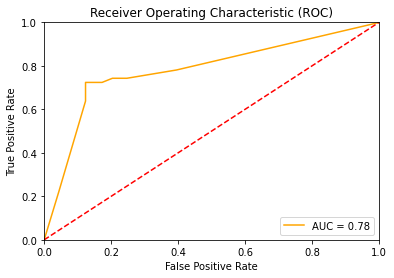

In [72]:
#Get accuracy, precision, recall and F1 score
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

print_metrics(y_test, scores)

#plot auc curve
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plot_auc(y_test, probabilities)

With an approximate 80% accuracy and an AUC value of 0.78, it's safe to say that this logistics regression model can accurately predict whether a passenger has or has not survived the Titanic crash using teh appropriate categorical features.